## Lab1

Funkcja do obliczania iloczyny dwóch wektorów:

In [20]:
function vector_multiplication(A, B) # dot(A,B)
    if (size(A,1) != size(B,1))
        error("Vectors A and B must have the same length.")
    end

    result = 0
    for i in 1:size(A, 1)
        result += A[i] * B[i]
    end
    return result
end

vector_multiplication (generic function with 1 method)

Funkcja do mnożenia macierzy kwadratowej przez wektor:

In [21]:
function matrix_multiplication(A, B) # A * B
    if size(A, 2) != size(B, 1)
        error("Number of columns in A must equal number of rows in B")
    end

    result_vec = Vector{Float64}()
    for i in 1:size(A, 1)
        result_row = vector_multiplication(A[i, :], B) # można było zrobić: result_row = dot(A[i, :], B)
        push!(result_vec, result_row)
    end
    return result_vec
end

matrix_multiplication (generic function with 1 method)

Uruchomienie funckji dla 10 różnych wymiarów i zapisanie danych do pliku "results.csv".

In [22]:
using Random
using CSV
using DataFrames

A = [1;1]
B = [1;1]
@elapsed vector_multiplication(A, B)

A = [1 2 3; 4 5 6; 7 8 9]
B = [1, 2, 3]
@elapsed matrix_multiplication(A, B)

dimensions = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
results = DataFrame(Dimension = Int[], TimeVect = Float64[], TimeMatrix = Float64[]) 

for i in dimensions
    for j in 1:10
        A = rand(1:10, i)
        B = rand(1:10, i)
        C = rand(1:10, i, i)
        time_vector = @elapsed vector_multiplication(A, B) 
        time_matrix = @elapsed matrix_multiplication(C, B) 
        push!(results, (i, time_vector, time_matrix)) 
    end
end

CSV.write("results.csv", results)

"results.csv"

Odczyt danych z pliku i zapisanie ich w DataFrame.

In [23]:
df = CSV.read("results.csv", DataFrame)

Row,Dimension,TimeVect,TimeMatrix
,Int64,Float64,Float64
1,10,5.2e-6,8.6e-6
2,10,4.0e-7,1.6e-6
3,10,3.0e-7,1.9e-6
4,10,2.0e-7,1.4e-6
5,10,2.0e-7,1.0e-6
6,10,1.0e-7,1.0e-6
7,10,1.0e-7,1.1e-6
8,10,1.0e-7,1.0e-6
9,10,1.0e-7,9.0e-7


Grupowanie danych po wymiarach i obliczenie dla każdego z nich średnią i odchylenie standardowe.

In [24]:
using Statistics  

results_grouped = groupby(df, :Dimension)

vector_funcion_stats = combine(results_grouped, "TimeVect" => mean, "TimeVect" => std)
matrix_funcion_stats = combine(results_grouped, "TimeMatrix" => mean, "TimeMatrix" => std)

Row,Dimension,TimeMatrix_mean,TimeMatrix_std
,Int64,Float64,Float64
1,10,1.98e-6,2.34748e-6
2,20,2.78e-6,5.00666e-7
3,30,4.48e-6,4.61399e-7
4,40,7.89e-6,7.01506e-7
5,50,9.96e-6,4.35125e-7
6,60,1.365e-5,1.63112e-6
7,70,1.921e-5,3.86795e-6
8,80,3.879e-5,6.98673e-6
9,90,6.143e-5,5.71043e-6


Tworzymy wykresy przedstawiające wyniki dla każdej z funckji.

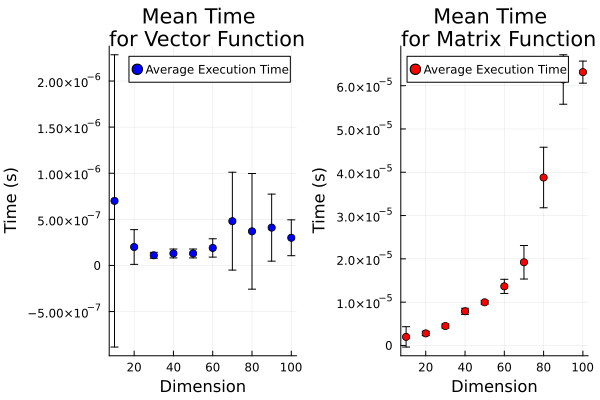

In [25]:
using Plots

p1 = scatter(vector_funcion_stats.Dimension, [vector_funcion_stats."TimeVect_mean"], yerr=vector_funcion_stats."TimeVect_std", 
    xlabel="Dimension", ylabel="Time (s)", label="Average Execution Time", title="Mean Time \n for Vector Function", 
    color="blue")

p2 = scatter(matrix_funcion_stats.Dimension, [matrix_funcion_stats."TimeMatrix_mean"], yerr=matrix_funcion_stats."TimeMatrix_std",
    xlabel="Dimension", ylabel="Time (s)", label="Average Execution Time", title="Mean Time \n for Matrix Function", 
    color="red")

plot(p1, p2, layout=(1,2))